In [1]:
conda install quandl


Note: you may need to restart the kernel to use updated packages.
Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.



DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/notices.json HTTP/1.1" 404 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.c

### Step 1 - Choose Dataset

#### Choosing the dataset on homicides per 100,000 by year in European countries provides insights into public safety trends and their social implications. It allows for comparative analysis, particularly when paired with data like Airbnb prices, to explore potential correlations between tourism and crime rates. This dataset is also valuable for policy development and academic research, offering a comprehensive view of crime dynamics across different European contexts.

### Step 2 - Import Libraries and Data

In [2]:
#import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [3]:
#apikey
quandl.ApiConfig.api_key = 'xbzy_ddZdzfzgWgL1BYB'

In [4]:
#import df
df = quandl.get_table('WB/DATA',series_id='VC.IHR.PSRC.P5', country_code='NLD,GRC,ESP,DEU,HUN,PRT,GBR,FRA,ITA,AUT')

In [5]:
df.head()

,series_id,country_code,country_name,year,value
None,,,,,
0,VC.IHR.PSRC.P5,PRT,Portugal,2021,0.796882
1,VC.IHR.PSRC.P5,PRT,Portugal,2020,0.786546
2,VC.IHR.PSRC.P5,PRT,Portugal,2019,0.709432
3,VC.IHR.PSRC.P5,PRT,Portugal,2018,0.787185
4,VC.IHR.PSRC.P5,PRT,Portugal,2017,0.737325


In [6]:
#rename column to match data
df.rename(columns={'value': 'homicides_per_100k'}, inplace=True)

In [7]:
df.head()

,series_id,country_code,country_name,year,homicides_per_100k
None,,,,,
0,VC.IHR.PSRC.P5,PRT,Portugal,2021,0.796882
1,VC.IHR.PSRC.P5,PRT,Portugal,2020,0.786546
2,VC.IHR.PSRC.P5,PRT,Portugal,2019,0.709432
3,VC.IHR.PSRC.P5,PRT,Portugal,2018,0.787185
4,VC.IHR.PSRC.P5,PRT,Portugal,2017,0.737325


### Step 3 - Make Subset of Data

In [8]:
#create subset of data for years past 2000
filtered_df = df[(df['year'] >= 2000)]

In [9]:
filtered_df.shape

(218, 5)

In [10]:
# Reset index and then set 'year' as the new index for time series analysis
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.set_index('year', inplace=True)

In [11]:
filtered_df.head(100)

,series_id,country_code,country_name,homicides_per_100k
year,,,,
2021,VC.IHR.PSRC.P5,PRT,Portugal,0.796882
2020,VC.IHR.PSRC.P5,PRT,Portugal,0.786546
2019,VC.IHR.PSRC.P5,PRT,Portugal,0.709432
2018,VC.IHR.PSRC.P5,PRT,Portugal,0.787185
2017,VC.IHR.PSRC.P5,PRT,Portugal,0.737325
...,...,...,...,...
2014,VC.IHR.PSRC.P5,GRC,Greece,0.984998
2013,VC.IHR.PSRC.P5,GRC,Greece,1.401804
2012,VC.IHR.PSRC.P5,GRC,Greece,1.514096


#### Analyzing the homicide rate by country from 2000 onwards can provide valuable insights into the long-term safety and stability of different European countries, which is a significant factor for travelers when choosing Airbnb accommodations. A lower or decreasing homicide rate often correlates with a perception of safety and can increase a destination's attractiveness to tourists, potentially influencing the demand and pricing for Airbnb listings in those areas.

In [12]:
#create subset of UK homicides
df_UK_homicides = filtered_df[(filtered_df['country_code'] == 'GBR')]

In [13]:
df_UK_homicides

,series_id,country_code,country_name,homicides_per_100k
year,,,,
2020,VC.IHR.PSRC.P5,GBR,United Kingdom,1.003587
2019,VC.IHR.PSRC.P5,GBR,United Kingdom,1.150068
2018,VC.IHR.PSRC.P5,GBR,United Kingdom,1.136483
2017,VC.IHR.PSRC.P5,GBR,United Kingdom,1.224555
2016,VC.IHR.PSRC.P5,GBR,United Kingdom,1.201733
2015,VC.IHR.PSRC.P5,GBR,United Kingdom,0.999626
2014,VC.IHR.PSRC.P5,GBR,United Kingdom,0.909322
2013,VC.IHR.PSRC.P5,GBR,United Kingdom,0.937758
2012,VC.IHR.PSRC.P5,GBR,United Kingdom,0.982624


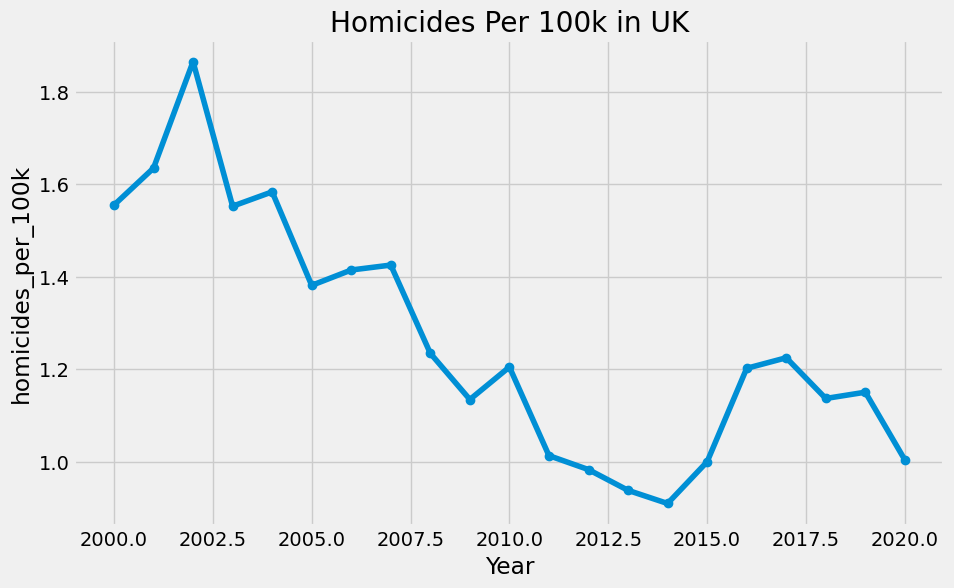

In [14]:
#create line plot
plt.figure(figsize=(10,6))
plt.plot(df_UK_homicides['homicides_per_100k'], marker='o')
plt.title('Homicides Per 100k in UK')
plt.xlabel('Year')
plt.ylabel('homicides_per_100k')
plt.grid(True)
plt.show()

#### Step 5 - Perform Decomposition

In [15]:
df_UK_homicides

,series_id,country_code,country_name,homicides_per_100k
year,,,,
2020,VC.IHR.PSRC.P5,GBR,United Kingdom,1.003587
2019,VC.IHR.PSRC.P5,GBR,United Kingdom,1.150068
2018,VC.IHR.PSRC.P5,GBR,United Kingdom,1.136483
2017,VC.IHR.PSRC.P5,GBR,United Kingdom,1.224555
2016,VC.IHR.PSRC.P5,GBR,United Kingdom,1.201733
2015,VC.IHR.PSRC.P5,GBR,United Kingdom,0.999626
2014,VC.IHR.PSRC.P5,GBR,United Kingdom,0.909322
2013,VC.IHR.PSRC.P5,GBR,United Kingdom,0.937758
2012,VC.IHR.PSRC.P5,GBR,United Kingdom,0.982624


In [16]:
# Convert the 'year' index to string and add '-01-01' to each year
df_UK_homicides.index = df_UK_homicides.index.astype(str) + '-01-01'

In [17]:
df_UK_homicides.index = pd.to_datetime(df_UK_homicides.index)

In [18]:
df_UK_homicides

,series_id,country_code,country_name,homicides_per_100k
year,,,,
2020-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,1.003587
2019-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,1.150068
2018-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,1.136483
2017-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,1.224555
2016-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,1.201733
2015-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,0.999626
2014-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,0.909322
2013-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,0.937758
2012-01-01,VC.IHR.PSRC.P5,GBR,United Kingdom,0.982624


In [19]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_UK_homicides['homicides_per_100k'], model='additive')

In [20]:
# set size for charts
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

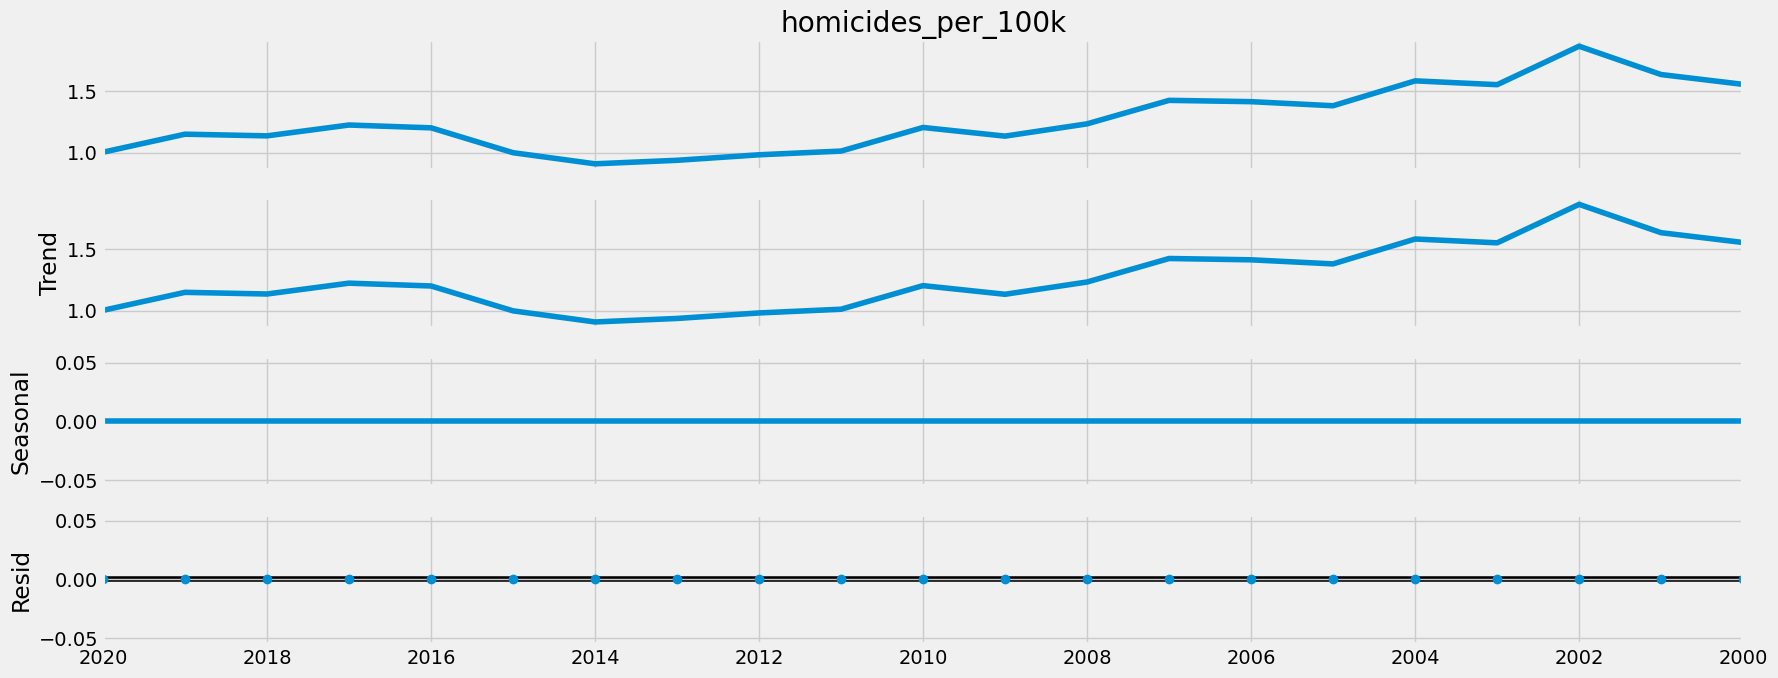

In [21]:
# Plot the separate components
decomposition.plot()
plt.show()

#### The decomposition of the UK's annual homicide data shows a slight upward trend in rates over time, with no seasonal variation and minimal noise, indicating that the increase is driven by longer-term factors rather than short-term fluctuations.

### Step 6 - Conduct Dickey-Fuller test

In [22]:
#import autocorrelation and partial 
from statsmodels.tsa.stattools import adfuller

In [23]:
#run dicket fuller test
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply the test using the function on the time series
dickey_fuller(df_UK_homicides['homicides_per_100k'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.084524
p-value                         0.721204
Number of Lags Used             0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


#### The null hypothesis for this test states that the time series is non-stationary (has a unit root). Since the test statistic is not lower than the critical values and the p-value is high, it indicates that the time series (UK homicide rate data) is likely non-stationary.

### Step 7 - Conduct Round of Differencing

In [24]:
# Calculate the first difference of the series
df_UK_homicides_diff = df_UK_homicides['homicides_per_100k'].diff().dropna()

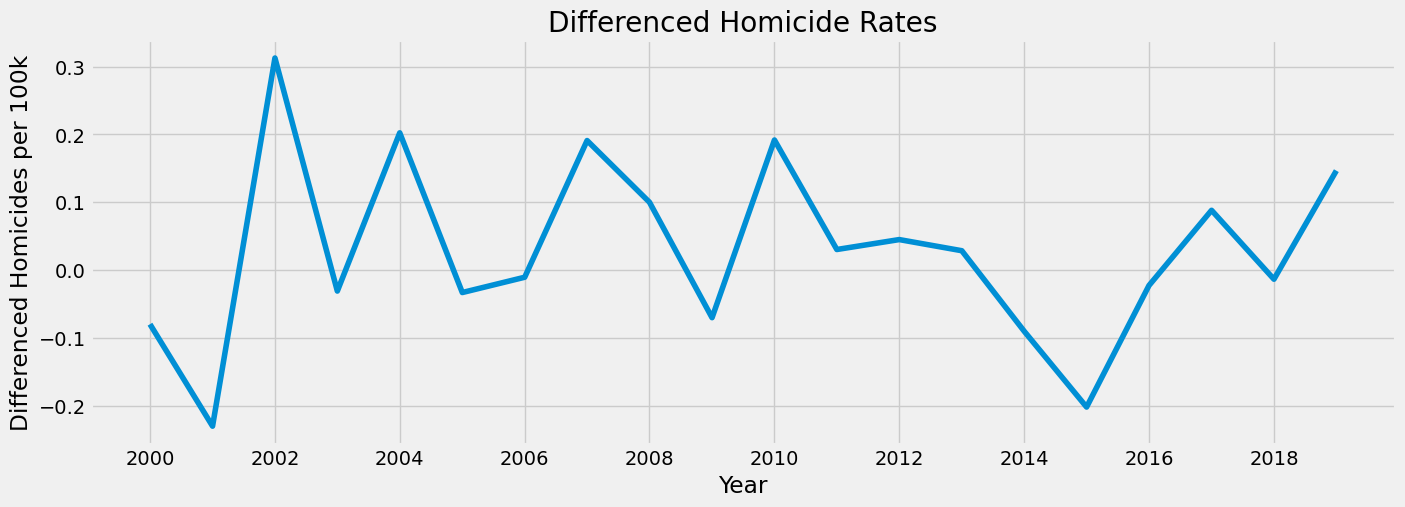

In [25]:
#Visualizing the differenced data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_UK_homicides_diff)
plt.title('Differenced Homicide Rates')
plt.xlabel('Year')
plt.ylabel('Differenced Homicides per 100k')
plt.show()

In [26]:
#Repeat the Dickey-Fuller test
dickey_fuller(df_UK_homicides_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.016635e+01
p-value                        7.281781e-18
Number of Lags Used            8.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Value (10%)          -2.729839e+00
dtype: float64


#### These results strongly suggest that the null hypothesis of the Dickey-Fuller test (which states that the time series is non-stationary) can be rejected. The differencing has effectively removed the non-stationary components from the time series, making it suitable for further analysis or modeling that assumes stationarity, such as ARIMA modeling.

### Step 9 - Check for Autocorrelations

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

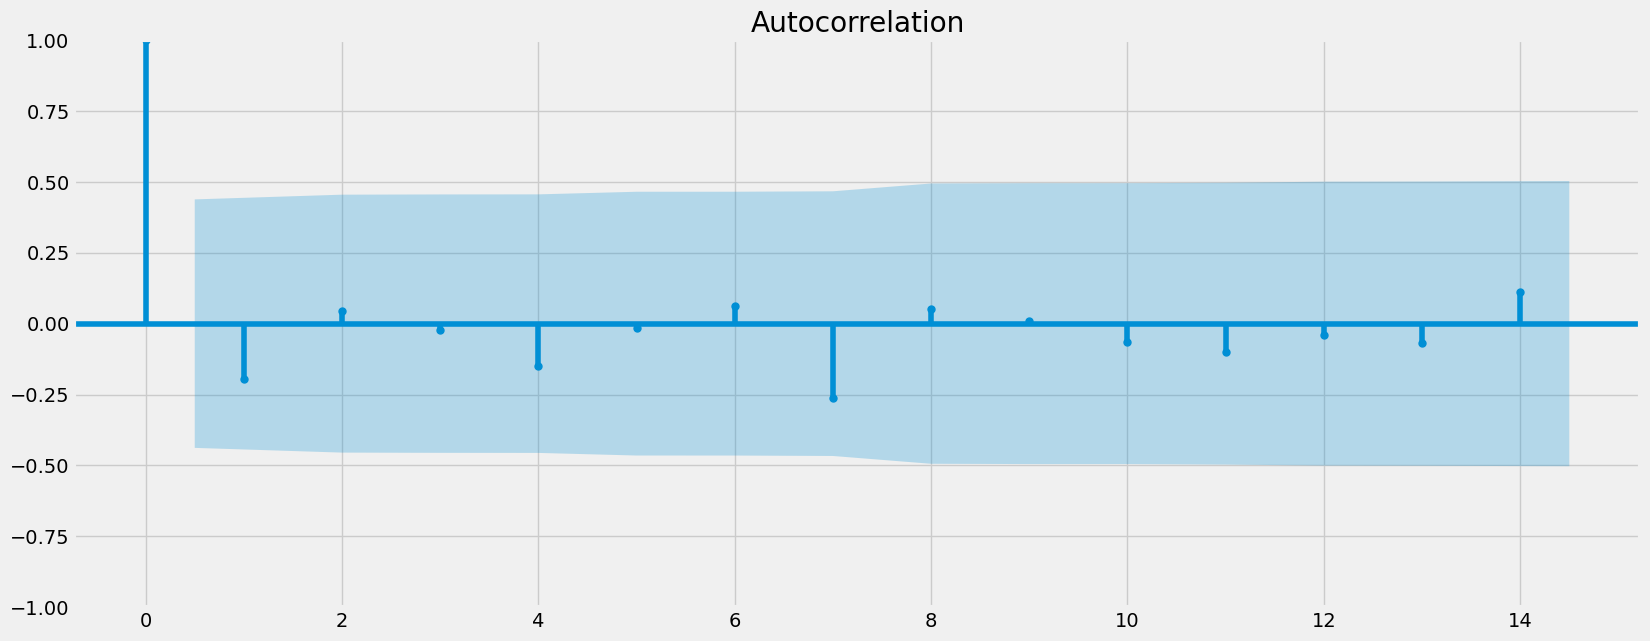

In [28]:
plot_acf(df_UK_homicides_diff)
plt.show()